11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.1160 - accuracy: 0.0111 - val_loss: 0.0621 - val_accuracy: 0.0128
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0616 - accuracy: 0.0142 - val_loss: 0.0609 - val_accuracy: 0.0143
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0599 - accuracy: 0.0164 - val_loss: 0.0595 - val_accuracy: 0.0159
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0584 - accuracy: 0.0120 - val_loss: 0.0576 - val_accuracy: 0.0055
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0563 - accuracy: 0.0072 - val_loss: 0.0556 - val_accuracy: 0.0058
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0548 - accuracy: 0.0072 - val_loss: 0.0545 - val_accuracy: 0.0091
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0541 - 

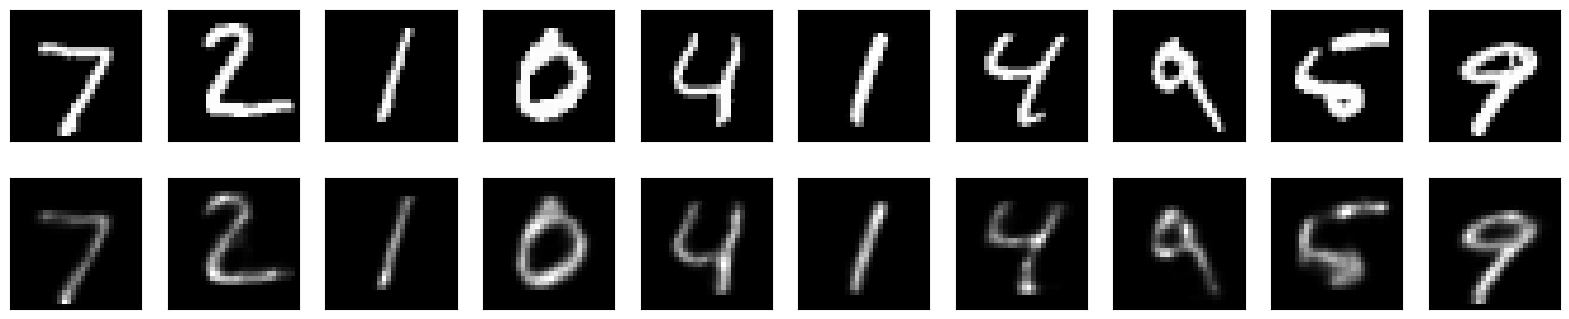

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.0490 - accuracy: 0.0156 - val_loss: 0.0493 - val_accuracy: 0.0151
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0490 - accuracy: 0.0167 - val_loss: 0.0493 - val_accuracy: 0.0153
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0490 - accuracy: 0.0167 - val_loss: 0.0493 - val_accuracy: 0.0124
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0490 - accuracy: 0.0160 - val_loss: 0.0493 - val_accuracy: 0.0142
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0490 - accuracy: 0.0160 - val_loss: 0.0493 - val_accuracy: 0.0143
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0489 - accuracy: 0.0163 - val_loss: 0.0493 - val_accuracy: 0.0162
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0489 - accuracy: 0.0163 - val_loss: 0.0492 - val_accuracy: 0.0171
Epoch 

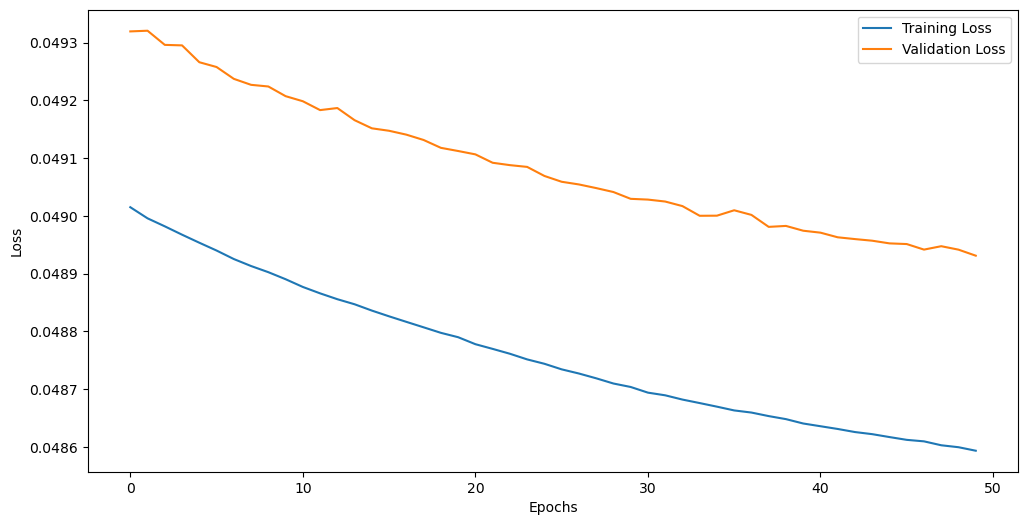

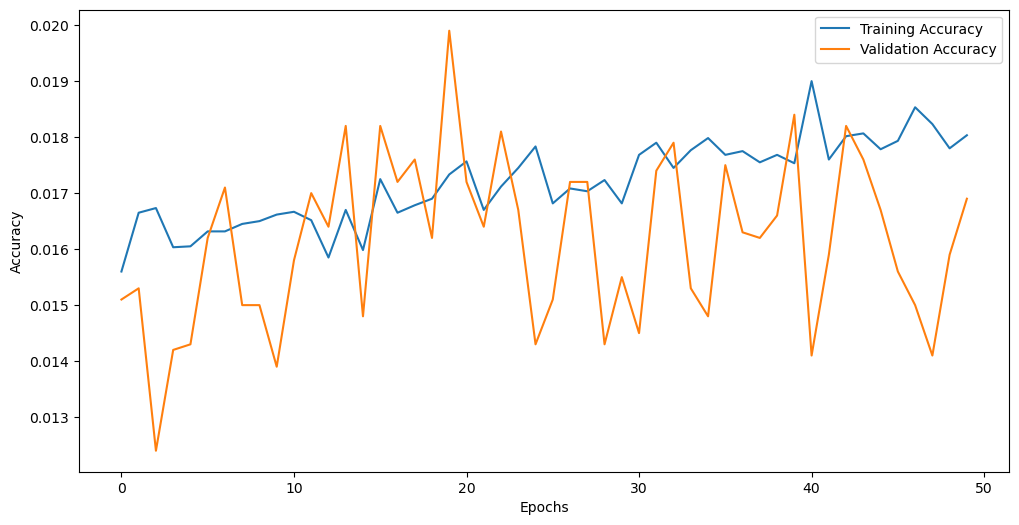

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize
(train_data, _), (test_data, _) = mnist.load_data()
train_data = train_data.reshape((len(train_data), 28 * 28)).astype('float32') / 255
test_data = test_data.reshape((len(test_data), 28 * 28)).astype('float32') / 255
train_data = normalize(train_data)
test_data = normalize(test_data)


input_layer = Input(shape=(784,))  
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)  
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(train_data, train_data, epochs=50, batch_size=256, shuffle=True, validation_data=(test_data, test_data))

encoded = Dense(32, activation='relu')(encoded)
autoencoder_with_extra_layer = Model(input_layer, decoded)
autoencoder_with_extra_layer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
predicted_images = autoencoder_with_extra_layer.predict(test_data)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


history = autoencoder_with_extra_layer.fit(train_data, train_data, epochs=50, batch_size=256, shuffle=True, 
                                          validation_data=(test_data, test_data))

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
